# Week 3: Likelihoods

<hr style="border:2px solid gray">
<a id='outline'></a>

# Outline [^](#outline)

1. [Likelihoods](#section1)
1. [Likelihood ratio tests](#section2)
1. [Exercises](#exercises)

Last week we discussed hypothesis testing and we looked at two particular kinds of tests, the $\chi^{2}$ test and the K-S test(s). 

We also discussed the concept of the *power* of a test (related to the Type-II error rate), which can be used to decide appropriate tests to use depending on the alternate hypotheses we have in mind. In hypothesis testing, the Type-I and Type-II error rates are handles we can tune for a specific choice of test-statistic but is there a way to choose the test-statistic to minimize both of these error rates for any dataset?

To find out, we first need to discuss the concept of likelihoods.

<hr style="border:2px solid gray">
<a id='section2'></a>

# Section One: Likelihoods [^](#outline)

We have met the likelihood before when we discussed Bayes' theorem. Recall that Bayes' theorem tell us that for two events $A$ and $B$, we can construct the following relationship between the associated probabilities, 

$$
P(A|B) = P(B|A)\dfrac{P(A)}{P(B)}
$$.

What if we replace $B$ with the outcome of some random variable $X$, and $A$ with a specific hypothesis - say a null hypothesis for a hypothesis test $H_{0}$? Bayes' theorem now reads, 

$$
P(H_{0}|X) = P(X|H_{0})\dfrac{P(H_{0})}{P(X)}
$$.

Let's take a look at the terms now. 

   * $P(H_{0})$ is known as the *prior* probability of the null hypothesis and represents a probability that we would associate to the hypothesis before seeing any data
   * $P(H_{0}|X)$ is known as the *posterior* probability, ie the probability we assign to the hypothesis after we have made the measurement or observed the random value for $X$. 

These two concepts are where frequentist and Bayesian statisticians differ. A Bayesian statistician would be perfectly happy to assign a probability to a hypothesis, since the Bayesian definition of probability is associated with a degree of belief in a particular outcome. In the frequentist definition of probability, it doesn't make sense to think of the hypothesis having any random nature - eg the hypothesis that General Relativity describes Mercury's orbit is a fixed statement. 

For our purposes, we don't need to get too bogged down into this debate, but rather let's focus on the two terms that Bayesian and frequentist statisticians agree on, 

  * $P(X|H_{0})$ is known as the *likelihood* of the measurement $X$ under the hypothesis $H_{0}$. 
  * $P(X)$ is a normalising factor that represents the probability to obtain the data under any hypothesis - you can just think of this as $P(X)=\sum_{H}P(X|H)$.

For hypothesis testing, we only need the likelihood term. We often write this down as $L(H_{0})$ when performing hypothesis tests since the data are fixed - i.e they are taken from some measurement - for hypothesis testing.  

## Calculating the likelihood

For a single random variable $X$, it is easy to calculate the likelihood for a specific hypothesis $H$ given the definition, i.e 

$$
L(X) = P(X|H)
$$

which simply means "the value of the likelihood for the hypothesis $H$ is the conditional probability of $X$ given $H$". 

For example, if $X$ is tossing a "head" on a coin and we choose a null hypothesis $H_{0}$ as the hypothesis that the coin is fair, then $L(H_{0}) = P(\text{head}|H_{0})=0.5$.

Suppose we make repeated trials of the random variable $X$. We can still calculate the likelihood since we know how to calculate the probability for independent random variables - it's just the product of the individual probabilities. Let's say we toss the coin five times in a row and get the sequence $(h,t,t,h,t)$ ($h=$ head, $t=$ tail), then the likelihood for $H_{0}$ is just, 

$$
L(H_{0}) = P(h|H_{0})P(t|H_{0})P(t|H_{0})P(h|H_{0})P(t|H_{0}) = 0.5^{5} \approx 0.0313
$$

What if we hypothesised that the coin was unfair with $P(h)=0.6$ and $P(t)=0.4$ - let's call this hypothesis $H_{1}$. The likelihood is now, 

$$
L(H_{1}) = P(h|H_{1})P(t|H_{1})P(t|H_{1})P(h|H_{1})P(t|H_{1}) = 0.6^{2}\times 0.4^{3} \approx 0.023
$$

We can see that the likelihood for $H_{0}$ is larger than for $H_{1}$. This comparison of likelihoods is a key concept in hypothesis testing. In fact, the likelihood alone is not what we will use, but rather the *ratio of likelihoods* that will be important. 


We can also see from this example that likelihood values tend to be *extremely small* given we end up taking products over probability densities. It is much easier to work with the log of the likelihood so we typically do that instead. 


### Example Binary log-likelihood

Consider a binary random process, eg a sequence of heads or tails for a coin toss, or a sequence of cats and dogs in a random set of pet photographs. Let's assume each outcome follows a Bernoulli distribution, where we assign one outcome as "success" and the other as a "failure". 

Let's assume the probability for **success** (head, cat, etc) is $p$ and the probability for failure (tail, dog, etc) is therefore $(1-p)$ - ie this is our hypothesis, let's denote it $H_{p}$. 

Let's denote the label (head or tail, cat or dog) for each event with the random variable $X$ which can take the value 1 or 0. The probabilities are therefore, 

  * $P(X=1)=p$
  * $P(X=0)=1-p$

This probability can be concisely written as, 

$$
P(X) = p^{X}(1-p)^{(1-X)}
$$

(can you convince yourself that this is true?)

The likelihood for our sequence of events can now be written as, 

$$
L(H_{p}) = \prod_{i}p^{X_{i}}(1-p)^{1-X_{i}}
$$

As we have already said, we typically deal with log-likelihoods when we need to compute likelihoods for large data samples, so this gives us, 

$$
\ln L(H_{p}) = \sum_{i}X_{i}\ln(p) + (1-X_{i})\ln(1-p)
$$

This log-likelihood is very quick to evaluate as its just a simple sum over logs of numbers. 

In [18]:
import numpy as np 

binary_observations = np.random.choice([0,1],size=1000,replace=True)

n = len(binary_observations)
p = 0.1

ln_L = np.log(p)*np.sum(binary_observations)+np.log(1-p)*(n-np.sum(binary_observations))
print("Binary log-likehood: ",ln_L)

Binary log-likehood:  -1236.9311729859792


Those who already have some experience with machine learning classifiers will recognise this as the *binary cross entropy* loss. Note however, we have simply used the definition of a (log-)likelihood to obtain it!

It is possible that $p$ is not a fixed number but depends on parameters of a model and/or many different observables (features) in our data. This will be the basis for machine learning for classification using the binary cross entropy loss function - the task is to approximate what this function $p$ is. 

Let's not get ahead of ourselves and get back to the concept of hypothesis testing. We will see how likelihoods are used to maximise the power of our hypothesis test. 

### Likelihoods for continuous random variables

In our definition of the likelihood, we used the *probability* for measuring a given value under a specific hypothesis. For continuous random variables, obtaining a probability requires integrating over some region. Instead of performing such an integral, we simply modify the definition of the likelihood to be, 

$$
L(H) = f(X|H)
$$

where $f(X|H)$ is the *probability density function* for the continuous random variable $X$ under the hypothesis $H$. If you think about it, to obtain the probability in a very small region close to $X$, we could approximate $P(X)\approx f(X)dX$ so the $dX$ will cancel when we compare likelihoods. 

For a set of independent continuous measurements $(X_{1},X_{2},\ldots,X_{N})$, the likelihood becomes,

$$
L(H) = \prod_{i=1}^{N}f(X_{i}|H)
$$

In the example below, we will calculate the likelihood for a set of data under the hypothesis $f(X)$ is an exponential distribution with a slope parameter of 1. We will use `scipy.stats.expon` object to do the calculation for us. 

In [ ]:
import numpy as np
from scipy.stats import expon

measurements = np.array([0.72863217, 0.30653282, 0.99725302, 1.95956204, 1.60472692, 0.48397563, 0.14558313, 4.60142088, 0.55139557, 1.30257874])

l_H = np.prod(expon.pdf(measurements))
print("Likelihood exponential distribution: {}".format(l_H))

Likelihood exponential distribution: 3.1075966247446967e-06


Again, it is much easier to work with the log of the likelihood so we typically do that instead. Fortunately, `scipy` has builtin functionality to take the log of its pdf values. Remember, 

$$
\ln L(H) = \ln \prod_{i}^{N}f(X_{i}|H) = \sum_{i=1}^{N} \ln f(X_{i}|H)
$$

In [ ]:
log_l_H = np.sum(expon.logpdf(measurements))
print("log-Likelihood exponential distribution: {}".format(log_l_H))

log-Likelihood exponential distribution: -12.68166092


These are much more reasonable numbers to work with, especially when we want to code up likelihoods in python. It can be convenient to write the probability (or probability density) for each event $i$ as $p_{i}:=P(X_{i}|H)$ or $f(X_{i}|H)$, and often (especially later in the Machine Learning lectures) you will see this kind of notation being used.

### Example Likelihood for Gaussian distributions 

Let's revisit our Gaussian example. Suppose we have a random variable $X$ that is distributed according to a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. 

The likelihood for a measured value of $X$ will be 

$$
L(\text{Gaussian}) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\dfrac{1}{2}\left(\dfrac{{X-\mu}}{\sigma} \right)^{2}}
$$


For a set of independent random variables $X_{i}$ each distributed as a Gaussian with means $\mu_{i}$ and standard deviation $\sigma_{i}$, we have 

$$
L(\text{Gaussians}) = \prod_{i}\frac{1}{\sigma_{i}\sqrt{2\pi}}e^{-\dfrac{1}{2}\left(\dfrac{{X_{i}-\mu_{i}}}{\sigma_{i}} \right)^{2}}
$$

Now taking the log, we find, 

$$
\ln L(\text{Gaussians}) = -\sum_{i}\left(\ln (\sigma_{i}\sqrt{2\pi}) + \dfrac{1}{2}\left(\dfrac{{X_{i}-\mu_{i}}}{\sigma_{i}} \right)^{2}\right)
$$

This looks rather familiar to something we've seen last lecture.

As with the exponential probability distribution, we can use the `logpdf` function from `scipy.stats.norm` to obtain the likelihood for any given set of observations. In the example below, we assume that all of the events are drawn from the same  Gaussian - i.e their PDFs have the same $\mu$ and $\sigma$ parameter. 

In [2]:
import numpy as np
from scipy.stats import norm

observations = norm.rvs(loc=0, scale=1, size=100)
ln_l = np.sum(norm.logpdf(observations))
print("log-Likelihood normal distribution: {}".format(ln_l))

log-Likelihood normal distribution: -140.3987478312366


## Binned likelihoods

We often make the distinction between **binned** likelihood and **un-binned** likelihoods. 

A binned likelihood is simply a product  of Poisson likelihoods since the count in each bin is distributed as a Poisson random variable. If you have some probability  density function $f$, then the Poisson parameter $\lambda$ for the bin defined as the range $[x_{a},x_{b}]$ is 
defined as,

\begin{equation}
    \lambda = N\int_{x_{a}}^{x_{b}} f(x)dx
\end{equation}

where $N$ is the total number of events.

To get the most out of the data, the un-binned likelihood is always better, however there may be restrictions that mean the binned likelihood is more appropriate. For example, if using MC simulation to estimate the probability distribution function of some random variable, you can use a histogram to do so and hence you will need to use a binned likelihood. Also, you might find that for computation, the binned likelihood is faster - this is usually the case if you have many events in your dataset. 

This comes with a price since the number of bins you will need scales very poorly with the number of observables (features of your data). This is known as the curse of dimensionality and is something that machine learning can help overcome! We won't cover that here so just be aware of this practical limitation.  

In the example below, we will calculate the binned log-likelihood  for the observations using 10 equally spaced bins for the variable $X$.

In [23]:
import numpy as np
from scipy.stats import poisson

def PoissonLambda(a,b):
    # function to return the integral of the normal distribution between a and b
    return len(observations)*(norm.sf(a) - norm.sf(b))

def Count(a,b,observations):
    # function to return the number of events between the range a and b
    return np.size(observations[(observations >= a) & (observations < b)])

bins = np.linspace(-5,5,num=10,endpoint=True)
intervals = [[bins[i],bins[i+1]] for i in range(len(bins)-1)]

# get the counts in data and integrals for each interval
counts = [Count(x[0],x[1],observations) for x in intervals]
lambdas = [PoissonLambda(x[0],x[1]) for x in intervals]

binned_ln_l = np.sum([poisson.logpmf(c,l) for c,l in zip(counts,lambdas)])

print("binned log-Likelihood normal distribution: {}".format(binned_ln_l))

binned log-Likelihood normal distribution: -13.892246693601543


We can make a plot to represent this calculation. Note that the more narrow the bins we choose, the better we will approximate the PDF. 

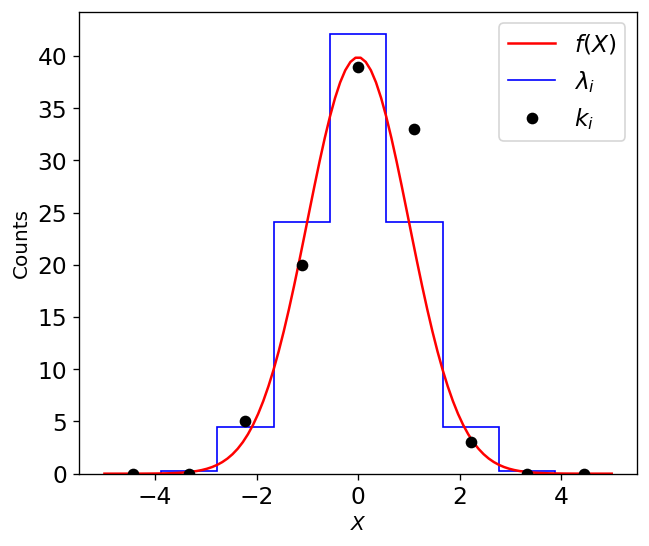

In [29]:
fig, ax = plt.subplots(1,1,figsize=(6,5),dpi=120)
ax.plot(np.linspace(-5,5,100),sum(lambdas)*norm.pdf(np.linspace(-5,5,100)),color='red',label='$f(X)$')
ax.stairs(lambdas,edges=bins,color='blue',label='$\\lambda_{i}$')
ax.plot(bins[:-1]+0.5*(bins[1]-bins[0]),counts,marker='o',linestyle='None',color='black',label='$k_{i}$')
ax.set_xlabel('$X$',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)
ax.legend()

 This binned log-likelihood value is not the same value as the un-binned version that we calculated. When we come to use the likelihood as a test-statistic, as we will discuss in the next section, this won't be an issue. Generally speaking, the absolute value of the log-likelihood is not an interesting quantity, but it's value relative to other hypotheses is very useful. 

 Remember that for large values of $\lambda$, the Poisson probability density with parameter $\lambda$ can be approximated by a Gaussian distribution with parameters $\mu=\lambda$, $\sigma=\sqrt{\lambda}$. The binned likelihood is therefore well approximated by the $\chi^{2}$ statistic for large event counts in each bin. 

## Summary


In this section, we have introduced the concept of a likelihood and, 

* Defined how likelihoods are calculated for discrete and continuous random variables
* Described how likelihoods are calculated for datasets with multiple entries
* Calculated likelihoods for Gaussian examples and showed how to derive pulls 
* Discussed binned likelihoods 

In the following section, we will discuss the Likelihood ratios and the Neyman-Pearson lemma

<hr style="border:2px solid gray">
<a id='section3'></a>

# Section 2: Likelihood ratio tests [^](#outline)

Now let's turn back to the concept of hypothesis testing and finding the test-statistic with the best power. 

Remember that a test-statistic $t$ is some function of our random variable $X$ which can be multivariate and/or be some large dataset. We defined the critical region $c$ for this test statistic as being the region for which, 

$$
\int_{c} f(t|H_{0}) dt = \alpha
$$

where $f(t|H_{0})$ is the distribution of the test statistic under the null hypothesis. 

It must also be true then that there is an equivalent region in our random variable space (let's call it $c^{\prime}$) where, 

$$
\int_{c^{\prime}} f(X|H_{0}) dX = \alpha
$$

where $f(X|H_{0})$ is the probability distribution for our measured values of $X$. This is of course the same as the likelihood under the null hypothesis! 

Similarly, we defined the power of the test as,

$$
\int_{c^{\prime}} f(X|H_{1}) dX = 1-\beta
$$

For a specific value of $\alpha$, we want to find the region $c$ for the test statistic or equivalently $c^{\prime}$ for the data space where this power will be maximised. 

##

### The Neyman-Pearson Lemma
<div style="background-color:#FFCCCB">

The Neyman-Pearson Lemma is a very powerful result in statistics that tells us how to choose the critical region that yields the maximum power for a test. Let's see how that comes about

We can re-write the expression for the power as, 
$$
    1-\beta  = \int_{c^{\prime}}f(X|H_{1})dX

             = \int_{c^{\prime}}\frac{f(X|H_{1})}{f(X|H_{0})}f(X|H_{0})dX

             =  E\left[\frac{f(X|H_{1})}{f(X|H_{0})}\right]_{c^{\prime}},
$$

where the last line denotes the expectation value inside $c^{\prime}$, under the null hypothesis of the quantity,

$$
\Lambda=\dfrac{f(X|H_{1})}{f(X|H_{0})}=\dfrac{L(H_{1})}{L(H_0)}.
$$

This quantity is the ratio of the likelihood function, evaluated under the two hypotheses. The expectation will be maximal when $c^{\prime}$ is chosen to contain the largest values of $\Lambda$. This should be obvious since if we are integrating over some region that we are free to choose provided that $\int_{c^{\prime}} f(X|H_{0}) dX = \alpha$, then the result tells us its best to include regions where $\Lambda$ is largest. 

The quantity $\Lambda = \dfrac{L(H_{1})}{L_(H_{2})}$ is commonly known as the likelihood ratio (LHR) and since the Neyman-Pearson lemma tells us that we should use it to construct the critical region, we might as well directly use it to create our test-statistic! 

Since we are dealing with likelihoods, it's common practice to take the log (in fact the negative log) of $\Lambda$ to avoid dealing with small numbers when doing numerical analysis. Thus, the test-statistic we should use is, 

$$
-\ln(\Lambda) = -\ln \left(\dfrac{L(H_{1})}{L(H_0)}\right)  = \ln L(H_{0}) - \ln L(H_{1})
$$

Note that here we have also included a minus sign (sometimes we call this the negative log-likelihood ratio), which is a convention that will come in handy later. This means that **large values** of $\Lambda$ correspond to **large negative values** of $-\ln (\Lambda)$. 


### Gaussian example 

Let's look at our simple Gaussian example for hypothesis testing. In the cell below, we estimate the distribution of the above test statistic under the null hypothesis $H_{0}$ (a Gaussian with $\mu=0$ and $\sigma=1$) and an alternate hypothesis $H_{1}$ (a Gaussian with $\sigma=1$ and $\mu=$ a modifiable value). We are using random generation (the Monte Carlo method) to obtain these distributions, however you could figure them out analytically if you feel like a challenge!

The left figure shows the  distribution of $-\ln(\Lambda)$ under the null and alternate hypotheses. You can change the critical region (shaded gray box) $c^{\prime}$ by sliding the lower and higher values of this range to see how the values of $\alpha$ and $1-\beta$ changes on the right plot. Note that the red line will only show the last 100 points that you tested. 

In [18]:
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import to_rgba 

from scipy.stats import norm

# Change the mean of the alternative hypothesis to some value
mean_H1 = 1.5

#xrange = np.linspace(-5,5,100)

samplesH0 = norm.rvs(0,1,10000)
samplesH1 = norm.rvs(mean_H1,1,10000)

def LHR(sample):
    return np.log(norm.pdf(sample,0,1))-np.log(norm.pdf(sample,mean_H1,1))

samplesH0 = LHR(samplesH0)
samplesH1 = LHR(samplesH1)
saved_points = []


def plot(Xl,Xh):

    global saved_points
    fig, ax = plt.subplots(1,2,figsize = (12,5),dpi = 150)

    ax[0].hist(samplesH0,bins=30,color='black', histtype='step',density='true',zorder = 1,label="$f(-\\ln(\\Lambda)|H_{0})$")
    ax[0].hist(samplesH1,bins=30,color='orange', histtype='step', density='true', zorder = 2,label="$f(-\\ln(\\Lambda)|H_{1})$")
    ax[0].set_ylim(bottom = 0)
    ax[0].set_xlim(-8,8)
    
    ax[0].set_xlabel('$-\\ln(\\Lambda)$',fontsize = 12)
    ax[0].set_ylabel('$f(-\\ln(\\Lambda)|H)$',fontsize = 12)
    ax[0].tick_params(direction='in',top=True,right=True,which='both',labelsize =12)
    

    ax[0].xaxis.set_minor_locator(MultipleLocator(0.5))
    ax[0].yaxis.set_minor_locator(MultipleLocator(0.5))
    ax[0].axvline(x=Xl,color='black',linestyle='--',label='$X_l = $%.2f'%(Xl))
    ax[0].axvline(x=Xh,color='black',linestyle='--',label='$X_h = $%.2f'%(Xh))
    ax[0].axvspan(Xl, Xh, color='gray', alpha=0.5)

    ax[0].grid('xkcd:dark blue',alpha = 0.2)

    ax[0].legend()

    if Xl > Xh:
        Xl,Xh = Xh,Xl

    alpha = len(samplesH0[(samplesH0>Xl) & (samplesH0<Xh)])/len(samplesH0)
    ombeta = len(samplesH1[(samplesH1>Xl) & (samplesH1<Xh)])/len(samplesH1)

    ax[1].plot(alpha,ombeta,color='blue',linestyle='none',marker='o')
    ax[1].set_xlabel('$\\alpha$',fontsize = 12)
    ax[1].set_ylabel('$1-\\beta$',fontsize = 12)
    ax[1].grid('xkcd:dark blue',alpha = 0.2)
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(0,1)

    saved_points.append([alpha,ombeta])
    ax[1].plot([s[0] for s in saved_points],[s[1] for s in saved_points],color='red',linestyle='-') 
    

    if len(saved_points)>100: saved_points = saved_points[-10:-1]

ipywidgets.interact(plot,Xl=(-8,8,0.05), Xh=(-5,7,0.05))

interactive(children=(FloatSlider(value=0.0, description='Xl', max=8.0, min=-8.0, step=0.05), FloatSlider(valu…

<function __main__.plot(Xl, Xh)>

If we have a sample of data, we can use the likelihood ratio test to reject a particular hypothesis for a probability density that describes the data. In the file `data_events_1D.csv` there are 100 entries of a random variable $X$. We want to test if they are compatible with the hypothesis that they are distributed as a Gaussian distribution with $\mu=0$, $\sigma=1$ or an alternative hypothesis where $\mu=1$ $\sigma=1$ 

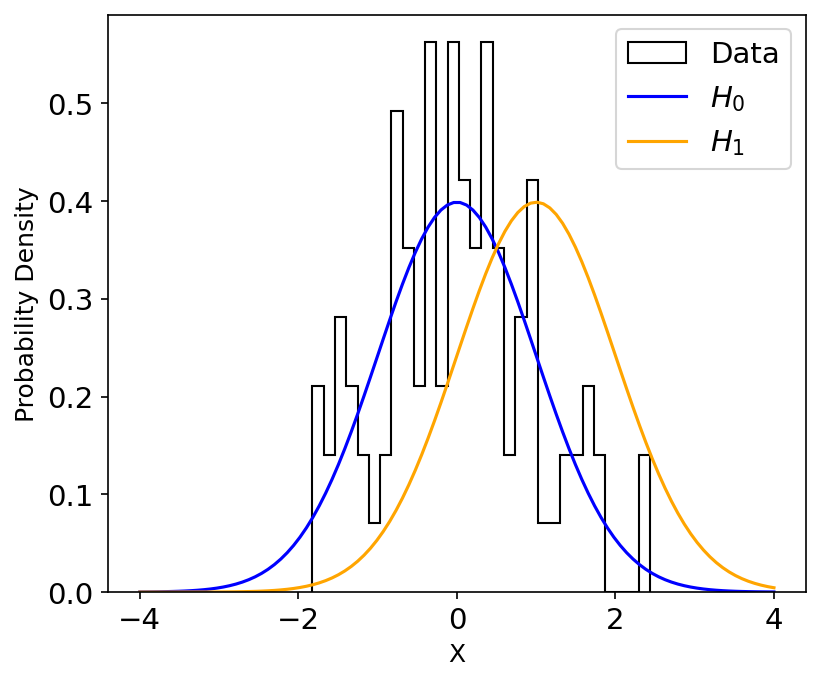

In [21]:
import pandas as pd 

df = pd.read_csv('data_1D.csv')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize = (6,5),dpi = 150)

ax.hist(df['data'], bins=30, color='black', histtype='step', density=True,label="Data")

xspace = np.linspace(-4,4,100)
ax.plot(xspace, norm.pdf(xspace,0,1), color='blue',label="$H_{0}$")
ax.plot(xspace, norm.pdf(xspace,1,1), color='orange',label="$H_{1}$")

ax.set_xlabel('X',fontsize = 12)
ax.set_ylabel('Probability Density',fontsize = 12)

ax.legend()

To write down the value of $-\ln(\Lambda)$, we should first calculate the likelihood values under $H_{0}$ and $H_{1}$. Remember that if we assume the events are independent, then we take the product of the PDF evaluated at each entry in the dataset to obtain the likelihood function, 

$$
L(H_{0}) = \prod_{i=1}^{100}f(X_{i};0,1) = \prod_{i=1}^{100}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left(X_{i}\right)^{2}}
$$

$$
L(H_{1}) = \prod_{i=1}^{100}f(X_{i};1,1) = \prod_{i=1}^{100}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\left(X_{i}-1\right)^{2}}
$$

Taking the natural logarithms, we find, 

$$
\ln L(H_{0}) = -100\ln(\sqrt{2\pi})-\sum_{i=1}^{100}\frac{1}{2}X_{i}^{2}
$$

$$
\ln L(H_{1}) = -100\ln(\sqrt{2\pi})-\sum_{i=1}^{100}\frac{1}{2}(X_{i}-1)^{2}
$$

and then, 
$$
-\ln(\Lambda) = -\sum_{i=1}^{100}\frac{1}{2}X_{i}^{2} +\sum_{i=1}^{100}\frac{1}{2}(X_{i}-1)^{2} = \sum_{i=1}^{100}\left(\frac{1}{2} - X_{i}\right) 
$$

This is a very simple function of our data set,

In [58]:
nlogLambda = sum(0.5-(df['data']))
print("negative Log-Likelihood ratio: ",nlogLambda)

negative Log-Likelihood ratio:  47.335530446463935


Let's compare this to the distribution of $-\ln(\Lambda)$ under the null hypothesis, and alternate hypothesis. We will use our Monte Carlo method to estimate the distribution of $-\ln(\Lambda)$;
  * Generate 100 random samples from the null hypothesis distribution 
  * Calculate the value of $-\ln(\Lambda)$ and keep the result 
  * Repeat the previous two steps many times (10000 is the number used below) and fill a histogram with the values 
  * Repeat everything above but this time using the alternate distribution. 

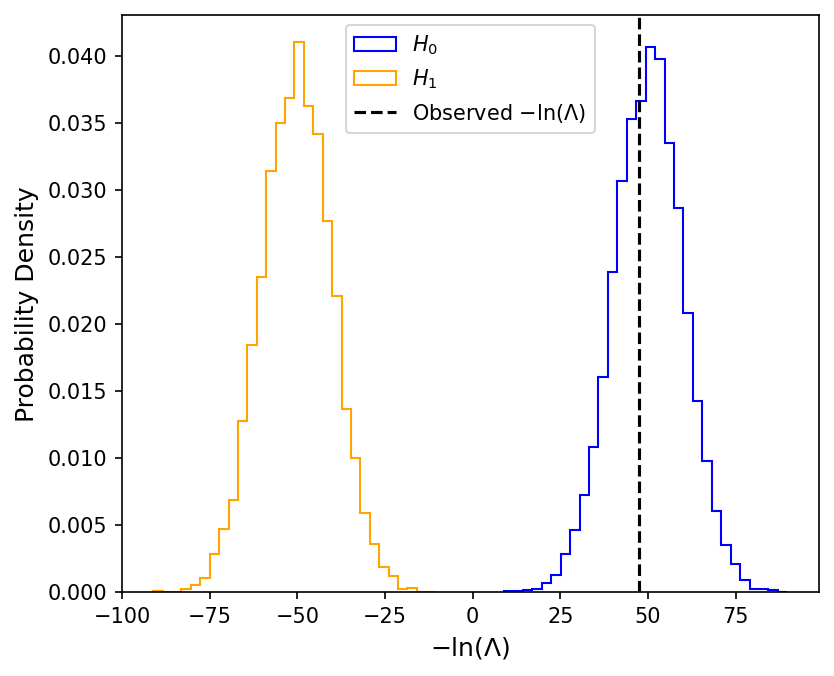

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize = (6,5),dpi = 150)

n_samples = 10000
nlogLambdaDistH0 = []
nlogLambdaDistH1 = []

for i in range(n_samples):
    rvsH0 = norm.rvs(0,1,size=len(df['data']))
    rvsH1 = norm.rvs(1,1,size=len(df['data']))

    nlogLambdaDistH0.append(sum(0.5-rvsH0))
    nlogLambdaDistH1.append(sum(0.5-rvsH1))


ax.hist(nlogLambdaDistH0, bins=30, color='blue', histtype='step', density=True,label="$H_{0}$")
ax.hist(nlogLambdaDistH1, bins=30, color='orange', histtype='step', density=True,label="$H_{1}$")

ax.axvline(nlogLambda,color='black',linestyle='--',label='Observed $-\\ln(\\Lambda)$')

ax.set_xlabel('$-\\ln(\\Lambda)$',fontsize = 12)
ax.set_ylabel('Probability Density',fontsize = 12)

ax.legend()

From these distributions we can define a critical region for a chosen value of $\alpha$ and determine whether or not the data are compatible with $H_{0}$.

<div style="background-color:#C2F5DD">

### Exercise

Extend the code by determining the critical region corresponding to $\alpha\approx 0.05$. 
   * With this value of $\alpha$ would you reject or accept the null hypothesis given the data provided?
   * What is the power of the test we have just performed?

In the figure below, we can see what the power of the Likelihood Ratio (LHR) test looks like for different values for the mean of $H_{1}$ where the value of $\alpha$ is fixed at 0.05, compared to the same using the K-S test. In this example, we have 100 independent random variables as the data sample size.

<img src='Week3_plots/HypothesisTest_KSLHR.jpg' align='center' width = 600>

As expected, the power is greater for the LHR test than the K-S test. As you will see in the exercises later, the likelihood ratio test can be used for multivariate random variables which makes it an extremely useful test in data science. 

## Deriving the $\chi^{2}$ test

In the previous week, we discussed the $\chi^{2}$ test-statistic for a function $f(X)$, defined as, 

$$
\chi^2 = \sum_i p_i^2 = \sum_i \frac{(y_i - f(X_i))^2}{(\sigma_i)^2},
$$
where $y_{i}$ are assumed to be independent random variables that are distributed as a Gaussian with mean value $f(X_{i})$ and standard deviation $\sigma_{i}$. Recall that the $X_{i}$ are the values of the control variable. 

We can see where this comes from now using our likelihood ratio. First, let's start with the fact that each $y_{i}$ is an independent Gaussian random variable with mean $f(X_{i})$ and standard deviation $\sigma_{i}$, we can write the likelihood as, ]

$$
L(H_{0}) = \prod_{i} \frac{1}{\sigma_{i}\sqrt{2\pi}} e^{-\frac{1}{2}\left(\dfrac{{y_{i}-f(X_{i})}}{\sigma_{i}} \right)^{2}}
$$

where the null hypothesis $H_{0}$ represents the hypothesis that the function $f(X)$ describes the data. 

We should take the natural log of this to get, 
$$
\ln  L(H_{0}) = - \left(\sum_{i}\ln (\sigma_{i}\sqrt{2\pi}) + \dfrac{1}{2}\left(\dfrac{{y_{i}-f(X_{i})}}{\sigma_{i}} \right)^{2}\right)
$$


To complete the likelihood ratio we also need a $H_{1}$. We can ask the question, which values of $f(X_{i})$ would give us the largest values of the likelihood function (or equivalently the largest log likelihood function)? 

Let's take a look at the log likelihood function for a single Gaussian measurement $y=10$ with $\sigma=0.5$ as a function of $f(X)$. 

Text(0, 0.5, '$\\ln L(f(X))$ when $y=$10')

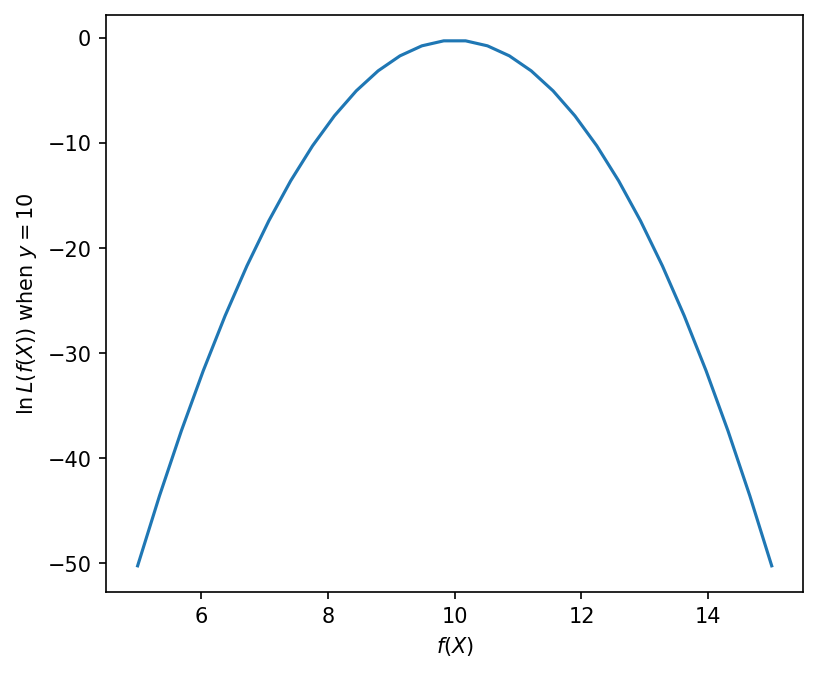

In [27]:
fig, ax = plt.subplots(1,1,figsize = (6,5),dpi = 150)

y = 10 
sigma = 0.5

frange = np.linspace(5,15,30)
ax.plot(frange,np.log(norm.pdf(y,frange,sigma)),label='Likelihood ratio')
ax.set_xlabel("$f(X)$")
ax.set_ylabel("$\\ln L(f(X))$ when $y=$%g"%y)

It is clear that the maximum value is found when $f(X) = y =10$ in this case. Try changing the value of $y$ and $\sigma$ to see if that makes a difference. 

For multiple measurements, we will find that the maximum of the log-likelihood function is found when $f(X_{i}) = y_{i}$ for all of the measured values (all $i$). So we can use this hypothesis as our "best" alternate hypothesis $H_{1}$. 

$$
\ln L(H_{1}) = - \sum_{i} \ln (\sigma_{i}\sqrt{2\pi}) + \dfrac{1}{2}\left(\dfrac{y_{i}-y_{i}}{\sigma_{i}} \right)^{2} =-\sum_{i}\ln (\sigma_{i}\sqrt{2\pi}) 
$$

If we plug these into our definition of $-\ln \Lambda$, we find that,  

$$
-\ln \Lambda = \ln L(H_{0}) - \ln L(H_{1}) = \sum_{i} \dfrac{1}{2}\left(\dfrac{{X_{i}-\mu_{i}}}{\sigma_{i}} \right)^{2}
$$

which is almost exactly the same as the $\chi^{2}$ test statistic except for the factor of $\dfrac{1}{2}$. It's also sometimes common to multiply $-\ln \Lambda$ by 2 to remove this factor, but its not necessary to see where we get the $\chi^{2}$ test statistic from. 

## Likelihood ratios as classifiers 

Let's look at another example of the likelihood ratio. Suppose $H_{0}$ is a single Gaussian with $\mu=0,\sigma=1$ and $H_{1}$ is the sum of two Gaussians with $\mu_{1}=\mu+\delta\mu, \mu_{2}=\mu-\delta\mu$ and $\sigma_{1}=\sigma_{2}=\sigma$. This would be the setup when measuring flashes from a light source. In this case $H_{0}$ would represent a single source and $H_{1}$ two sources separated by $2\delta\mu$, as shown in the figure below. 

<img src='Week3_plots/TwoVsOne.png' align='center' width = 900>

If $X$ is the measured position of a light pulse, we would expect to see the following distributions under the null and alternate hypotheses, depending on the chosen value of $\delta\mu$. 

In [19]:
import numpy
from scipy.stats import norm
import ipywidgets

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


# null hypothesis is a single source - Gaussian 
mu_H0 = 0
sigma_H0 = 1

# alt hypothesis is 2 sources  - 2 Gaussians 
def mu_1_H1(dmu):
    return mu_H0+dmu
def mu_2_H1(dmu):
    return mu_H0-dmu

xrange  = numpy.linspace(-5,5,100)

def plotH0H1(dmu):
    
    y_H0 = norm.pdf(xrange,mu_H0,sigma_H0)
    y_H1 = 0.5*(norm.pdf(xrange,mu_1_H1(dmu),sigma_H0)+norm.pdf(xrange,mu_2_H1(dmu),sigma_H0))


    plt.plot(xrange,y_H0,label="$H_{0}$")
    plt.plot(xrange,y_H1,label="$H_{1}$")
    plt.xlabel("$X$")
    plt.ylabel("$f(X|H_{0,1})$")

    plt.legend()


ipywidgets.interact(plotH0H1,dmu=(0,3,0.1))

interactive(children=(FloatSlider(value=1.0, description='dmu', max=3.0), Output()), _dom_classes=('widget-int…

<function __main__.plotH0H1(dmu)>

We can generate monte carlo simulation to see what the distribution of the test statistic looks like under each hypothesis. For the rest of this example, let's assume $\delta\mu=1.1$ Using this distribution we can also vary the value $-\ln\lambda_{max}$ that defines the upper bound of the critical region. With this, we can generate the curve of $\alpha$-vs-$1-\beta$.  

In [27]:
dmu=1.6

import random
import numpy as np

# function to find the negative log likelihood ratio
def nlogLR(data):
    lLH0    = sum(numpy.log(norm.pdf(data,mu_H0,sigma_H0)))
    lLH1    = sum(numpy.log(0.5*(norm.pdf(data,mu_1_H1(dmu),sigma_H0)+norm.pdf(data,mu_2_H1(dmu),sigma_H0))))
    
    return lLH0-lLH1

n_events = 1 # number of events

def mc_1G():
    x=norm.rvs(mu_H0,sigma_H0,size=n_events)
    return x

def mc_2G():
    mu_1_H1 = mu_H0+dmu
    mu_2_H1 = mu_H0-dmu
    if random.uniform(0,1)>0.5 : x=norm.rvs(mu_1_H1,sigma_H0,size=int(n_events))
    else: x=norm.rvs(mu_2_H1,sigma_H0,size=int(n_events))
    #x1 = numpy.concatenate([x1,x2])
    return x

# Distribution under H0 
n_samples = 10000

lHRH0 = []
for i in range(n_samples):
    xH0 = mc_1G()
    lHRH0.append(nlogLR(xH0))

# Distribution under H1
lHRH1 = []
for i in range(n_samples):
    xH1 = mc_2G()
    lHRH1.append(nlogLR(xH1))

lHRH0 = np.array(lHRH0)
lHRH1 = np.array(lHRH1)

alpha = 0.05 
dqmax = numpy.quantile(lHRH0,alpha)
ax.axvline(dqmax,color='black',linestyle='--',label="$-\\ln\\Lambda_{max}$")
ax.legend()

print(len(lHRH0[lHRH0<0.1])/len(lHRH0) )
alphac = [len(lHRH0[lHRH0<lnLmax])/len(lHRH0) for lnLmax in np.linspace(-5,1,100)]
ombetac = [len(lHRH1[lHRH1<lnLmax])/len(lHRH1) for lnLmax in np.linspace(-5,1,100)]

def plot(lnLmax):

    fig, ax = plt.subplots(1,2,figsize = (12,4),dpi = 140)

    ax[0].hist(lHRH0,histtype='step',label="$H_{0}$",density=True)
    ax[0].hist(lHRH1,histtype='step',label="$H_{1}$",density=True)
    ax[0].set_xlabel("$-\\ln(\\Lambda)$")
    ax[0].set_ylabel("$f(-\\ln\\Lambda)$")
    ax[0].axvline(lnLmax,color='black',linestyle='--',label="$-\\ln\\Lambda_{max}$")
    
    ax[0].legend()

    alpha = len(lHRH0[lHRH0<lnLmax])/len(lHRH0)
    ombeta = len(lHRH1[lHRH1<lnLmax])/len(lHRH1)

    ax[1].plot(alphac,ombetac,color='blue')
    ax[1].plot(alpha,ombeta,color='black',linestyle='none',marker='o')
    ax[1].set_xlabel('$\\alpha$',fontsize = 12)
    ax[1].set_ylabel('$1-\\beta$',fontsize = 12)
    ax[1].grid('xkcd:dark blue',alpha = 0.2)

ipywidgets.interact(plot,lnLmax=(-4,1,0.1))

0.2492


interactive(children=(FloatSlider(value=-2.0, description='lnLmax', max=1.0, min=-4.0), Output()), _dom_classe…

<function __main__.plot(lnLmax)>

Depending on the decision boundary (i.e where we place the value of $-\ln\Lambda_{max}$), we can achieve different values of $\alpha$ and $1-\beta$. When you get to the machine learning for classifiers part of the course, you will find that this kind of curve will be seen over and over to check how well the classifier is performing. 

<div style="background-color:#C2F5DD">

### Exercise

  * Change the value of $\delta\mu$ in the above code and see how the curve changes. Which values give better performance?
  * Can you modify the code such that the data sample is 50 light pulses instead of a single light pulse? You will need to be careful with how you generate the samples under $H_{1}$. 

## Summary


In this section, we have discussed the Neyman-Pearson lemma and how it leads to defining the *most powerful* hypothesis test. We also covered, 
  * How to calculate the likelihood ratio for a Gaussian random variable
  * How to define a "best" alternative hypothesis for Gaussian data and derive the $\chi^{2}$ test-statistic 
  * Likelihood ratios used in classification tasks. 

<hr style="border:2px solid gray">
<a id='section3'></a>

# Exercises [^](#outline)

<div style="background-color:#C2F5DD">

### Exercise 1

The Student's t-test is a simple hypothesis test. We only need to know the mean of the null distribution. In the Gaussian case, this is the $\mu$ parameter.

The test statistic is defined by, 

$$
t = \frac{\sqrt{N}}{X_{s}}\left(\bar{X} - \mu\right)
$$

where $\bar{X}=\frac{1}{N}\sum_{i}X_{i}$ is the sample mean, $X_{s}=\frac{1}{N}\sum_{i}$ and $N$ is the sample size.

Calculate the power of this test statistic in the case where the null distribution is a Gaussian with $\mu=0,\sigma=1$, and the alternate distribution is, 

1. A Gaussian distribution with $\mu=0$ and varying $\sigma$ with the following values `r_sigma_H1 = [0.1,0.6,0.8,0.9,1.1,1.2,1.6,2.1,2.6]`
2. A Gaussian distribution with $\sigma=1$ and varying $\mu$ with the followign values `r_mu_H1    = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35]`

where the sample size of the data is 100 events. Be careful to define a good criticial region for this particular test (think about which values of $t$ would indicate poor compatibility with $H_{0}$)!

Make a plot of the power for each value of the Gaussian parameter that you vary. How does the power compare to the likelihood ratio test? Why do you think the power vs $\sigma_{H1}$ looks the way that it does?

In [11]:
# Your answer here


<div style="background-color:#C2F5DD">

### Exercise 2

In the file `decay_data.csv`, there are observed decay times from a radioactive isotope (in micro-seconds). 

1. Plot a density histogram of the data from the file. 
2. Calculate the likelihood function $L$ for this data where the time $t$ is assumed to be distributed as an exponential decay function $f(t;\tau)\propto e^{-t/\tau}$, 
   * With parameter $\tau=2$.
   *  With parameter $\tau=1, 1.5, 2.0, 2.5,3,3.5,4$ and make a plot of $\ln(L)$ for each of these values of $\tau$.

3. Calculate a binned likelihood function and make the same plot as in question 2. - you should use 10 bins for this. How do these plots compare and what do you think they are telling you about the compatibility of different values of the $\tau$ parameter with the data. Which value of $\tau$ would you pick that best describes the data? Overlay a curve of the PDF using this value to your histogram from question 1. 

Make sure you first properly normalise the decay function in the range $t\in[0,+\infty)$. 

In [ ]:
# Your answer here

<div style="background-color:#C2F5DD">

### Exercise 3

Likelihood ratios can be used as classifiers in cases where the random variables are **multivariate**. 

In the file `multivariate_data.csv` there is a data sample of independent events, where each event has 3 features (columns), $X, Y$ and $Z$ and a label `Hypothesis` to indicate whether the event was generated from the null hypothesis (0) or alternate (1). 

  * The null hypothesis is a multivariate Gaussian distribution in $x,y,z$ with $\mu_{x},\mu_{y},\mu_{z}=0$ with $\sigma_{x}=\sigma_{y}=\sigma_{z}=1 with a diagonal covariance matrix 
  * The alternate hypothesis is a multivariate Gaussian distribution in $x,y,z$ with $\mu_{x}=0.5, \mu_{y}=-0.3,\mu_{z}=0.2$, $\sigma_{x}=0.4,\sigma_{y}=0.3,\sigma_{z}=0.7$, and with correlations $\rho_{xy}=0.3,\rho_{xz}=0.6,\rho_{yz}=0.5$. 

Remember that the correlation $\rho$ is defined by $V_{xy} = \rho_{xy}\sigma_{x}\sigma_{y}$ etc. 

Using the data provided, calculate the curve of $\alpha$, vs $1-\beta$ for a likelihood ratio hypothesis test statistic. 
   
   

In [ ]:
# Your answer here


<div style="background-color: #C2D5BD"> 

### Optional Exercise 4: 
If you are already somewhat familiar with machine learning models, train a classifier to separate the two hypotheses ($H_{0}$ and $H_{1}$) - how does this compare to your curve from Exercise 3?

In [ ]:
# Your answer here


<div style="background-color:#C2F5DD">

### Exercise 5:

The Higgs boson was discovered in 2012 at the LHC. The file `diphoton_mass.txt` contains events taken at the CMS detector from one of the most sensitive decay channels used in the discovery - the $H\rightarrow \gamma\gamma$ decay mode. Each row in the file contains the value of the diphoton mass $m_{\gamma\gamma}$, the invariant mass of two photons in selected events in the range $m_{\gamma\gamma}=(100,180)$ GeV.

In this question, you are going to run a hypothesis test using the data comparing $H_{0}:=$ only the background process is present in the data, $H_{1}:=$ both the background and Higgs boson processes are present in the data.

  * The background process can be assumed to be described as a power law distribution $f_{b}(m_{\gamma\gamma})\propto m_{\gamma\gamma} ^{-a}$ with $a=4.5$

  * The Higgs boson signal $f_{s}$ is a Gaussian distribution with $\mu=126$ and $\sigma=1.64$. The total probability density for $H_{1}$ can be described by $kf_{s}(m_{\gamma\gamma})+(1-k)f_{b}(m_{\gamma\gamma})$ where $k$ is the fraction of signal events that you can assume to be 0.01.

   1. Plot a density histogram of the events in the file and overlay the probability distributions for $m_{\gamma\gamma}$ for $H_{0}$ and $H_{1}$. Remember to properly normalise the distributions in the range for $m_{\gamma\gamma}$
   2. Calculate the log-likelihood $-\ln L$ under $H_{0}$ and $H_{1}$ for the data provided. Assuming a Type-I error of $\alpha=0.05$, perform a likelihood ratio hypothesis test - would you reject the null hypothesis given the data observed?  


Note: You can try to use the powerlaw implemented in Scipy Python from [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.powerlaw.html), or you can implement your own. If you choose the Scipy version, make sure to note the different definition for the support and parameter compared to that given in the exercise.  In either case, make sure you properly normalise the function over the range of the mass observable. 

In [ ]:
# Your answer here
